In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch Version:", torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

PyTorch Version: 2.0.1


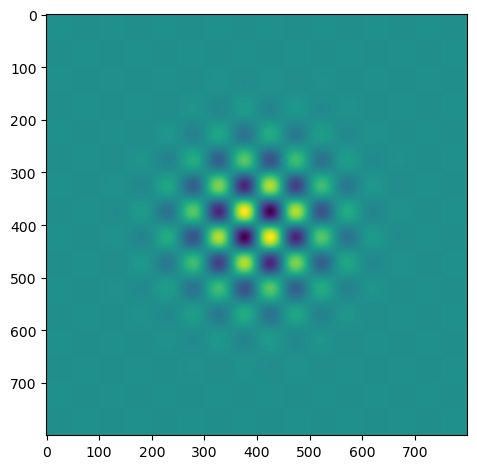

In [19]:
# Q1
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute 2D sine function
wavelength_x = 1.0
wavelength_y = 1.0
sine_func = torch.sin(2 * np.pi * x / wavelength_x) * torch.sin(2 * np.pi * y / wavelength_y)

# Compute Gaussian
z = torch.exp(-(x**2 + y**2) / 2.0)

# Compute the product of Gaussian and 2D sine function
# This is called modulation and you should get a Gabor filter, a mathematical function that is known
# to be a good approximation of a mammalian receptive field! We will use the theory of receptive fields
# later in the convolutional neural networks module of the course
z_product = z * sine_func

# Visualization
plt.imshow(z_product.cpu().numpy())
plt.tight_layout()
plt.show()

/var/folders/mz/ds6myhhj2ts775td8xdvsbgm0000gn/T/ipykernel_22144/1621791657.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


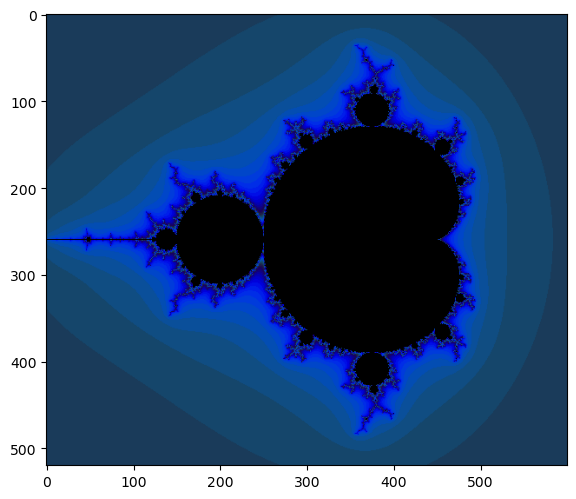

In [20]:
# QUESTION 2

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

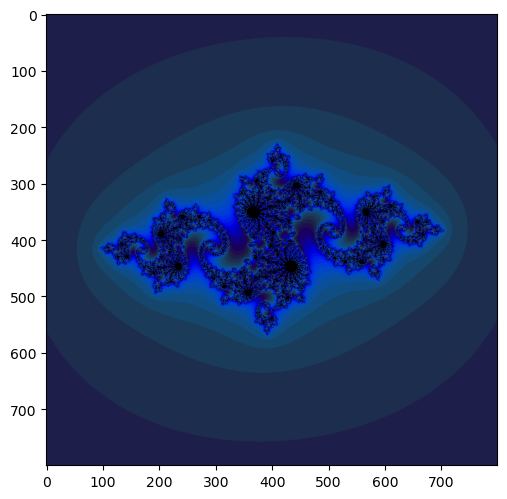

In [23]:
# QUESTION 2 JULIA SET

# Define the range and resolution of the region of interest
x_min, x_max, y_min, y_max = -2.0, 2.0, -2.0, 2.0
spacing = 0.005

# Create a high-resolution grid for computing the image
Y, X = np.mgrid[y_min:y_max:spacing, x_min:x_max:spacing]

# Convert the grid to PyTorch tensors and transfer to the GPU device
x = torch.Tensor(X)
y = torch.Tensor(Y)
x = x.to(device)
y = y.to(device)

# Define the Julia set function
def julia_set(z, c, max_iter=200):
    for i in range(max_iter):
        z = z**2 + c
        if torch.any(torch.abs(z) > 4):
            return i
    return max_iter

# Define the complex constant 'c' for the Julia set
c = torch.complex(torch.tensor(-0.8).to(device), torch.tensor(0.156).to(device))

# Compute the Julia set image
julia_image = torch.zeros_like(x, dtype=torch.float)
for i in range(x.shape[0]):
    for j in range(y.shape[1]):
        z = torch.complex(x[i, j], y[i, j])
        julia_image[i, j] = julia_set(z, c)

# Define the processFractal function for the Julia set
def processFractal(a):
    """Display an array of iteration counts as a colorful picture of a fractal."""
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

# Visualization
plt.imshow(processFractal(julia_image.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

/var/folders/mz/ds6myhhj2ts775td8xdvsbgm0000gn/T/ipykernel_22144/3951761860.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


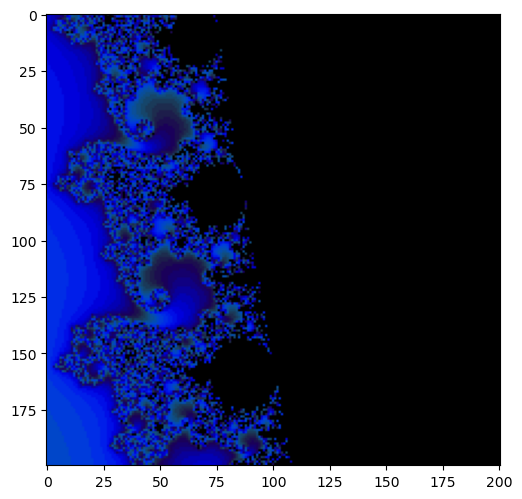

In [32]:
# QUESTION 2 ZOOM

# Define the range and resolution of the region of interest
x_min, x_max, y_min, y_max = -0.75, -0.73, 0.1, 0.12
spacing = 0.0001

# Create a high-resolution grid for computing the image
Y, X = np.mgrid[y_min:y_max:spacing, x_min:x_max:spacing]

# Convert the grid to PyTorch tensors and transfer to the GPU device
x = torch.Tensor(X)
y = torch.Tensor(Y)
x = x.to(device)
y = y.to(device)
z = torch.complex(x, y)
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

# Transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Mandelbrot Set
for i in range(500):
    # Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_
    
def processFractal(a):
    """Display an array of iteration counts as a colorful picture of a fractal."""
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

# Visualization
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Define the range and resolution of the region of interest
x_min, x_max, y_min, y_max = -1.3, 1.3, -2, 2
spacing = 0.005

# Create a high-resolution grid for computing the image
Y, X = np.mgrid[y_min:y_max:spacing, x_min:x_max:spacing]

# Convert the grid to PyTorch tensors and transfer to the GPU device
x = torch.Tensor(X)
y = torch.Tensor(Y)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(device)
z = torch.complex(x, y)
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

# Transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# ChaoS Fractal
for i in range(200):
    # Compute the new values of z: z^3 + z^2 + c
    zs_ = zs**3 + zs**2 + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_

def processFractal(a):
    """Display an array of iteration counts as a colorful picture of a fractal."""
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

# Visualization
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()
